In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler 


In [3]:
dados = pd.read_csv('data.csv',sep = ',')
dados.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
dados.describe

<bound method NDFrame.describe of                      date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view 

C:\Users\Admin\AppData\Local\Temp\ipykernel_15220\4273651442.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrM = dados.corr().round(2)


<Axes: >

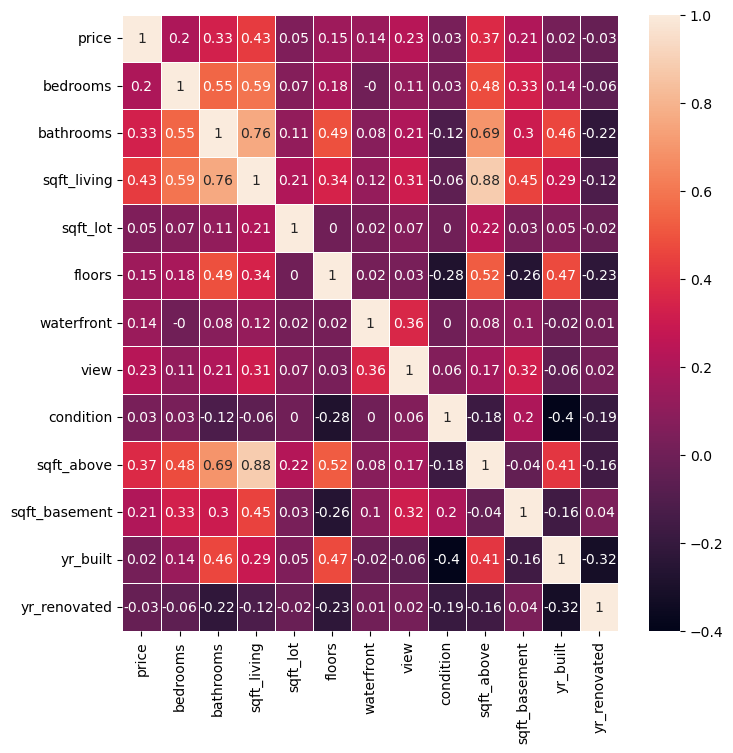

In [5]:
corrM = dados.corr().round(2)

fig,ax = plt.subplots(figsize = (8,8))
sns.heatmap(data = corrM, annot=True, linewidths=.5, ax = ax)

<Axes: xlabel='sqft_living', ylabel='price'>

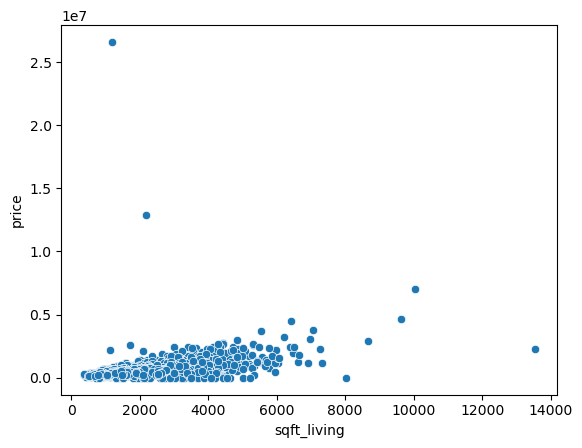

In [6]:
x = dados[['sqft_living','bathrooms']].values #Variaáveis a serem estudadas
y = dados['price'].values #Target

sns.scatterplot(data=dados, x = 'sqft_living', y = 'price')

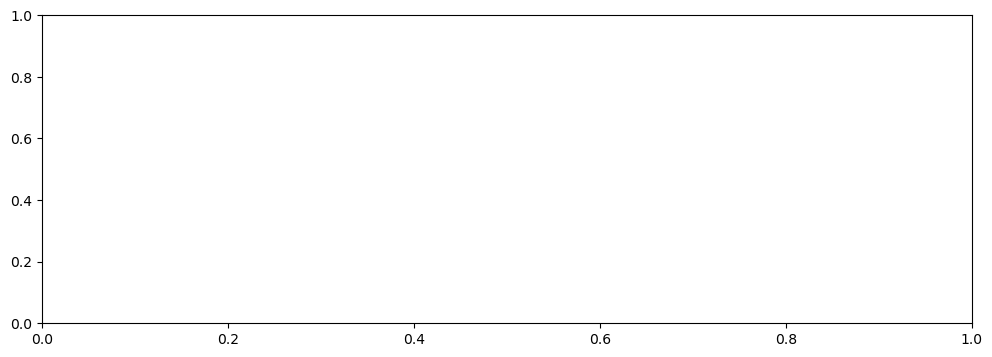

In [7]:
fig,axi = plt.subplots(figsize = (12,4))

ax.scatter(x[:,0],y);
ax.scatter(x[:,1],y);

<Axes: xlabel='sqft_living', ylabel='Count'>

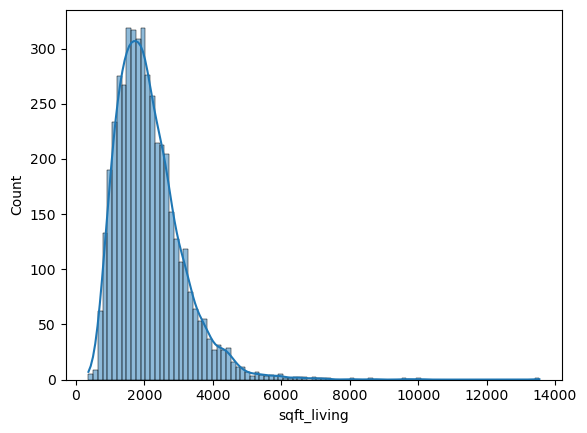

In [8]:
sns.histplot(data = dados, x = 'sqft_living', kde = True)

<Axes: xlabel='bathrooms', ylabel='Count'>

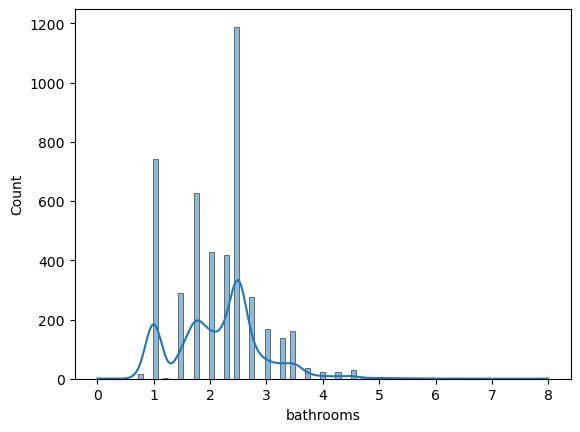

In [9]:
sns.histplot(data = dados, x = 'bathrooms', kde = True)

<bound method hist_series of 0       1.50
1       2.50
2       2.00
3       2.25
4       2.50
        ... 
4595    1.75
4596    2.50
4597    2.50
4598    2.00
4599    2.50
Name: bathrooms, Length: 4600, dtype: float64>

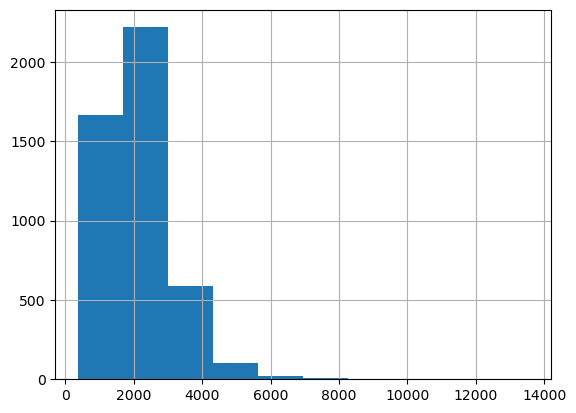

In [10]:
his_variaveis = pd.DataFrame(dados, columns=['sqft_living','bathrooms'])
his_variaveis.sqft_living.hist()
his_variaveis.bathrooms.hist

In [11]:
 #Bibliotecas de normalização e padronização dos dados
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [12]:
#Padronização
#Zera média e trabalha nos desvios padrões
scaler = StandardScaler()

x_std = scaler.fit_transform(x)

<Axes: >

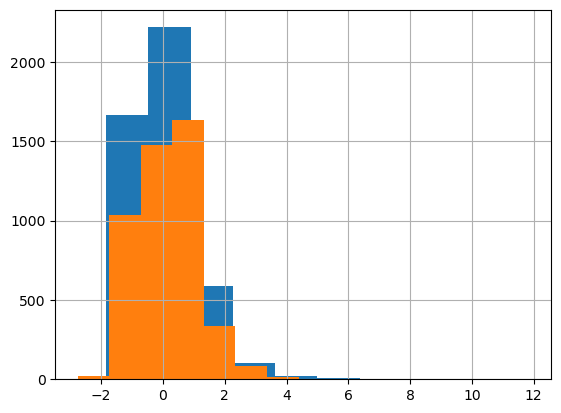

In [13]:
#Mostrando histogramas dos dados normalizados
x_std = pd.DataFrame(x_std, columns=["sqft_living","bathrooms"])

x_std.sqft_living.hist()
x_std.bathrooms.hist()

In [14]:
#Teste sem normalização
#Importando ambiente de testes e treinamento
from sklearn.model_selection import train_test_split 

#Importando modelo de regressão linear
from sklearn.linear_model import LinearRegression

#Importando validações de ML
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

x = dados[["sqft_living","bathrooms"]].values
y = dados["price"].values

#Criando aleatoriedade dos dados para teste e treinamento
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=7)

In [15]:
#Normalizando dados de treino
scaller = MinMaxScaler()
scaller.fit(x_train)

MinMaxScaler()

In [16]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [22]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)


LinearRegression()

In [23]:
y_pred = model.predict(x_test_scaled)

In [ ]:
#Validadando o modelo


In [25]:
MAE = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("MAE: ",MAE)
print("R2: ",r2)

MAE:  173536.74188212887
R2:  0.46058955967701587


In [29]:
model_normal = LinearRegression()
model_normal.fit(x_train, y_train)


LinearRegression()

In [30]:
y_pred_normal = model_normal.predict(x_test)
MAE = mean_absolute_error(y_test,y_pred_normal)
r2 = r2_score(y_test,y_pred_normal)

print("MAE: ",MAE)
print("R2: ",r2)

MAE:  173536.74188212887
R2:  0.460589559677016
